In [177]:
!pip install imutils

In [178]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import zipfile as zp
import os
import cv2
import random
import tensorflow as tf

from imutils import build_montages

from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,Dropout,Activation
from keras.optimizers import Adam,SGD,RMSprop
from keras.utils import np_utils
from keras.models import load_model
from keras.layers.normalization import BatchNormalization
from keras.models import model_from_json

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

sns.set()


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rockpaperscissors/README_rpc-cv-images.txt
/kaggle/input/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt
/kaggle/input/rockpaperscissors/rps-cv-images/paper/kVKp9kJji4urjoMs.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/JUn3VuVCoOKC5Nv2.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/JlMP0YH6vhxWRMZz.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/y2auZRkrUIi0wvd2.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/Qx31hf6YWyFs6Mu7.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/2tDgPZGqbrw95j39.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/v1b7FBFD4ZbLJnhB.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/B3dlyiRDulDJWOsW.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/Ht08RX3DQCSdl9Sy.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/vHbB53ZFtZoNcvAM.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/n5NXfZTRonR4iOr0.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/9v75qnx8zdeAAOq6.

/kaggle/input/rockpaperscissors/rps-cv-images/scissors/rGgiaJArxCsrf5RK.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/JTbM7M5ZIxA7oFEX.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/jwdItCvoNRkssn6D.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/v9Y88d4jR0phu1rv.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/PKilVWkKw9dYVTMx.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/psMU7A2lP3JHiyjV.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/VQI4ru8aVkvWIHT4.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/EkArrGlCdj8NNPbu.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/yiOfEmSzPhjaYDwH.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/M7i5TSor3J09Sy1O.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/KngvagTrRurJUlI5.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/1UojLz4CrT2G1Eo5.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/FHS2JqvlXGibavFw.png
/kaggle/inpu

/kaggle/input/rockpaperscissors/rps-cv-images/scissors/KM8TqJbWqew79vPt.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/56VICUKU6RgoLTHW.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/Cw34q0DptQFOEeoF.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/OA0s5AsfJEm96cxd.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/n3OFHC3Uz9y9JsaM.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/JKlTmX8oKzganNsN.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/pZ9zE5ahoKZhIZqm.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/BwX4LCp8V8FlquK1.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/esPjow7BN3RXc4gk.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/IdrewaHdlHRrNHbJ.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/LFzPbXpksRrG9jpF.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/nOIg15ZJ3XuUVkT3.png
/kaggle/input/rockpaperscissors/rps-cv-images/scissors/tTOLtCt5p5upFetg.png
/kaggle/inpu

/kaggle/input/rockpaperscissors/rps-cv-images/rock/Mc1ESNeg86L6CLRe.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/gN9QXTe8BSMMHyAn.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/dLacOlQK2ZsURwOa.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/GksMLm2b4t6sUYzY.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/mwbC6miMP5CXTp3a.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/pBRSGgUENwGb83VQ.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/fnIIkyRgH6znwmNp.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/tMiH4tj8YffHNl0O.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/HY0UHs2e3ydpvynQ.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/MJkLyjWTzbjL8qyk.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/y57pFGvddZimmNu8.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/fQPCA8oYZ8ywDgyv.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/BTcHjuerLAYWzx8S.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/PvAvhK0mbyEq1

/kaggle/input/rockpaperscissors/paper/kVKp9kJji4urjoMs.png
/kaggle/input/rockpaperscissors/paper/JUn3VuVCoOKC5Nv2.png
/kaggle/input/rockpaperscissors/paper/JlMP0YH6vhxWRMZz.png
/kaggle/input/rockpaperscissors/paper/y2auZRkrUIi0wvd2.png
/kaggle/input/rockpaperscissors/paper/Qx31hf6YWyFs6Mu7.png
/kaggle/input/rockpaperscissors/paper/2tDgPZGqbrw95j39.png
/kaggle/input/rockpaperscissors/paper/v1b7FBFD4ZbLJnhB.png
/kaggle/input/rockpaperscissors/paper/B3dlyiRDulDJWOsW.png
/kaggle/input/rockpaperscissors/paper/Ht08RX3DQCSdl9Sy.png
/kaggle/input/rockpaperscissors/paper/vHbB53ZFtZoNcvAM.png
/kaggle/input/rockpaperscissors/paper/n5NXfZTRonR4iOr0.png
/kaggle/input/rockpaperscissors/paper/9v75qnx8zdeAAOq6.png
/kaggle/input/rockpaperscissors/paper/DOuDihjhzIuZ2skd.png
/kaggle/input/rockpaperscissors/paper/yhXsHSeStA2dharc.png
/kaggle/input/rockpaperscissors/paper/wYsHIJDvNLDvn4m7.png
/kaggle/input/rockpaperscissors/paper/K6IACWoiTOnGR9Np.png
/kaggle/input/rockpaperscissors/paper/yWLbGUHRsGx5ocE9.p

/kaggle/input/rockpaperscissors/paper/ueuECCtQxOjHF1ij.png
/kaggle/input/rockpaperscissors/paper/ObnNNP8S6dH3IxIS.png
/kaggle/input/rockpaperscissors/paper/Ec6WrF6Soj4REPk7.png
/kaggle/input/rockpaperscissors/paper/DsaaqkHZUN3pmcwH.png
/kaggle/input/rockpaperscissors/paper/eASnEW16rlMUPMf3.png
/kaggle/input/rockpaperscissors/paper/BVfw3Er2AUBqREYJ.png
/kaggle/input/rockpaperscissors/paper/m4BUXxtLrhnsSUJ2.png
/kaggle/input/rockpaperscissors/paper/k5n1w4gdm1G27rDk.png
/kaggle/input/rockpaperscissors/paper/OMq2VJyb0KwtdwDc.png
/kaggle/input/rockpaperscissors/paper/SjE9MULuPPnbplHT.png
/kaggle/input/rockpaperscissors/paper/UWq276y40jnVYaPC.png
/kaggle/input/rockpaperscissors/paper/TlnoQ46NyW8oZV07.png
/kaggle/input/rockpaperscissors/paper/7ZGsbIMypDIEZxR0.png
/kaggle/input/rockpaperscissors/paper/a0CaFEDoDB7qeyhN.png
/kaggle/input/rockpaperscissors/paper/UJXhVbWUgUnzedxP.png
/kaggle/input/rockpaperscissors/paper/C0WynzBAhXQGSywJ.png
/kaggle/input/rockpaperscissors/paper/Gc4hUsoFAQBdulGg.p

/kaggle/input/rockpaperscissors/scissors/bzQcSRVP3M7abinD.png
/kaggle/input/rockpaperscissors/scissors/OWzxS6m9SGpk1bnY.png
/kaggle/input/rockpaperscissors/scissors/sUi91SccB2jXsjyd.png
/kaggle/input/rockpaperscissors/scissors/67sMDIYRNxuVsQQ8.png
/kaggle/input/rockpaperscissors/scissors/HLeuB19sXYxS84Gt.png
/kaggle/input/rockpaperscissors/scissors/R8yTHsEmwnN776s2.png
/kaggle/input/rockpaperscissors/scissors/Em50Yggfyz815VUH.png
/kaggle/input/rockpaperscissors/scissors/ttGVYechgB3WAlum.png
/kaggle/input/rockpaperscissors/scissors/SWoqkY88y24jzfHP.png
/kaggle/input/rockpaperscissors/scissors/JraYBjsfVGokNFhR.png
/kaggle/input/rockpaperscissors/scissors/TxkHaqZ5Mg3Jfs80.png
/kaggle/input/rockpaperscissors/scissors/mAjn51U2iJwlh99P.png
/kaggle/input/rockpaperscissors/scissors/YqEvBlhrl5XkzIlO.png
/kaggle/input/rockpaperscissors/scissors/2DEYFsJ27UgVqv3W.png
/kaggle/input/rockpaperscissors/scissors/YtwkLLgHWgoRfTaB.png
/kaggle/input/rockpaperscissors/scissors/Rc1pRmm4p20kAl7A.png
/kaggle/

/kaggle/input/rockpaperscissors/rock/dZ6rscIYTbmlwVZE.png
/kaggle/input/rockpaperscissors/rock/wnFnnnpg4cx8NeoO.png
/kaggle/input/rockpaperscissors/rock/82wZr9Bpl9vfsoG1.png
/kaggle/input/rockpaperscissors/rock/SE5eUJl8euX8gTJ3.png
/kaggle/input/rockpaperscissors/rock/NuJjhPSItSWUuMOk.png
/kaggle/input/rockpaperscissors/rock/Yzx0RwB2AFNAvC6s.png
/kaggle/input/rockpaperscissors/rock/clIAiFiURAZ36c8y.png
/kaggle/input/rockpaperscissors/rock/r87DASz5okmR0fnI.png
/kaggle/input/rockpaperscissors/rock/pYbu2Q82tjh9AGkt.png
/kaggle/input/rockpaperscissors/rock/BMet9oI6hmx1zdc9.png
/kaggle/input/rockpaperscissors/rock/j31qLVBZfstRnWsA.png
/kaggle/input/rockpaperscissors/rock/9txR3KPmEGdjo4A6.png
/kaggle/input/rockpaperscissors/rock/ZWrzVOGgkuKQRDnQ.png
/kaggle/input/rockpaperscissors/rock/IR0TvCNLcK7IrE1a.png
/kaggle/input/rockpaperscissors/rock/zZRojXITRo7bAIRT.png
/kaggle/input/rockpaperscissors/rock/g04l14MAwqQthuWW.png
/kaggle/input/rockpaperscissors/rock/O3ko4JxjCkdULELr.png
/kaggle/input/

In [179]:
os.getcwd()

'/kaggle/working'

In [180]:
rock = os.listdir('/kaggle/input/rockpaperscissors/rock/')
paper = os.listdir('/kaggle/input/rockpaperscissors/paper/')
sci= os.listdir('/kaggle/input/rockpaperscissors/scissors/')

fp_rock = '/kaggle/input/rockpaperscissors/rock/'
fp_paper = '/kaggle/input/rockpaperscissors/paper/'
fp_sci = '/kaggle/input/rockpaperscissors/scissors/'

In [181]:
train_images = []
test_images = []
outputs = []
labels = []
test_labels = []

a=0
b=0
c=0

for i in rock:
    if a < 700:
        image = cv2.imread(fp_rock+i)
        image = cv2.resize(image , (64,64))
        train_images.append(image)
        labels.append('Rock')
        a=a+1
        
    else:
        image = cv2.imread(fp_rock+i)
        image = cv2.resize(image , (64,64))
        test_images.append(image)
        outputs.append(image)
        test_labels.append('Rock')
        a=a+1
        
        
for i in paper:
    if b < 700:
        image = cv2.imread(fp_paper+i)
        image = cv2.resize(image , (64,64))
        train_images.append(image)
        labels.append('Paper')
        b=b+1
        
    else:
        image = cv2.imread(fp_paper+i)
        image = cv2.resize(image , (64,64))
        test_images.append(image)
        outputs.append(image)
        test_labels.append('Paper')
        b=b+1
        
for i in sci:
    if c < 700:
        image = cv2.imread(fp_sci+i)
        image = cv2.resize(image , (64,64))
        train_images.append(image)
        labels.append('Scissor')
        c=c+1
        
    else:
        image = cv2.imread(fp_sci+i)
        image = cv2.resize(image , (64,64))
        test_images.append(image)
        outputs.append(image)
        test_labels.append('Scissor')
        c=c+1






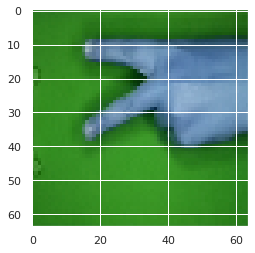

In [182]:
plt.imshow(train_images[2099])

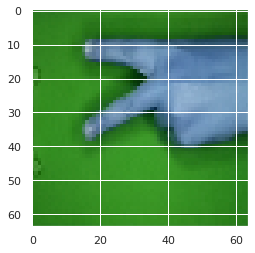

In [183]:
plt.imshow(train_images[-1])

In [184]:
train_images[0].shape

(64, 64, 3)

In [185]:
test_images[0].shape

(64, 64, 3)

In [186]:
train_images = np.array(train_images , dtype="float") / 255.0
test_images = np.array(test_images , dtype="float") / 255.0
labels = np.array(labels)

In [187]:
train_images.shape

(2100, 64, 64, 3)

In [188]:
test_images.shape

(88, 64, 64, 3)

In [189]:
(trainX , testX , trainY , testY) = train_test_split(train_images , labels , test_size=0.15 , random_state=46)

In [190]:
print(trainX.shape)
print(type(trainX))
print(trainY.shape)
print(type(trainY))
print(testX.shape)
print(type(testX))
print(testY.shape)
print(type(testY))

(1785, 64, 64, 3)
<class 'numpy.ndarray'>
(1785,)
<class 'numpy.ndarray'>
(315, 64, 64, 3)
<class 'numpy.ndarray'>
(315,)
<class 'numpy.ndarray'>


In [191]:
lb = LabelBinarizer()

In [192]:
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)


In [193]:
lb.classes_

array(['Paper', 'Rock', 'Scissor'], dtype='<U7')

In [194]:
trainY[0]

array([0, 1, 0])

In [195]:
testY[0]

array([0, 0, 1])

In [196]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = "same", activation ='relu', input_shape = (64,64,3)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(3,activation="softmax"))


In [197]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_22 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)       

In [198]:
INIT_LR = 0.01
EPOCHS = 20
BS = 32

opt = SGD(learning_rate=INIT_LR)

In [199]:
model.compile(loss='categorical_crossentropy' ,optimizer=opt,  metrics=["accuracy"])

In [200]:
H = model.fit(trainX , trainY , epochs=EPOCHS , batch_size=BS, validation_data =(testX,testY))

Train on 1785 samples, validate on 315 samples
Epoch 1/20
1785/1785 [==============================] - 3s 2ms/step - loss: 0.6576 - accuracy: 0.7754 - val_loss: 1.5724 - val_accuracy: 0.2857
Epoch 2/20
1785/1785 [==============================] - 1s 632us/step - loss: 0.2438 - accuracy: 0.9249 - val_loss: 1.4068 - val_accuracy: 0.4698
Epoch 3/20
1785/1785 [==============================] - 1s 620us/step - loss: 0.1373 - accuracy: 0.9585 - val_loss: 1.4936 - val_accuracy: 0.5048
Epoch 4/20
1785/1785 [==============================] - 1s 618us/step - loss: 0.0919 - accuracy: 0.9709 - val_loss: 1.3842 - val_accuracy: 0.4127
Epoch 5/20
1785/1785 [==============================] - 1s 611us/step - loss: 0.0665 - accuracy: 0.9731 - val_loss: 0.9865 - val_accuracy: 0.6190
Epoch 6/20
1785/1785 [==============================] - 1s 623us/step - loss: 0.0486 - accuracy: 0.9843 - val_loss: 0.8385 - val_accuracy: 0.6857
Epoch 7/20
1785/1785 [==============================] - 1s 620us/step - loss: 0

In [201]:
predictions = model.predict(testX)
predictions

array([[1.06667926e-07, 1.57199551e-07, 9.99999762e-01],
       [5.90878955e-08, 1.32114607e-07, 9.99999762e-01],
       [3.31445871e-10, 1.00000000e+00, 1.36888554e-08],
       [8.19651802e-07, 1.37187527e-07, 9.99999046e-01],
       [1.00640960e-07, 6.27927193e-07, 9.99999285e-01],
       [5.18085741e-10, 1.00000000e+00, 1.44914161e-08],
       [6.40526165e-09, 1.00000000e+00, 1.33917832e-09],
       [7.74918441e-09, 1.00000000e+00, 1.83945641e-08],
       [9.99079347e-01, 8.97404854e-04, 2.32209022e-05],
       [9.86975670e-01, 1.30175892e-02, 6.82516247e-06],
       [9.98893440e-01, 1.07235787e-03, 3.41439736e-05],
       [1.23608552e-04, 2.91461717e-08, 9.99876380e-01],
       [8.95576668e-10, 1.00000000e+00, 4.89460952e-08],
       [1.33355400e-07, 9.99999881e-01, 5.63312277e-08],
       [3.76495777e-08, 9.99999881e-01, 6.85144173e-08],
       [3.21608851e-10, 1.00000000e+00, 3.14168513e-09],
       [1.27856052e-04, 1.79367809e-04, 9.99692798e-01],
       [8.19701017e-06, 1.30688

In [202]:
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1),target_names=lb.classes_))

              precision    recall  f1-score   support

       Paper       0.98      0.99      0.98        89
        Rock       0.99      1.00      1.00       114
     Scissor       1.00      0.98      0.99       112

    accuracy                           0.99       315
   macro avg       0.99      0.99      0.99       315
weighted avg       0.99      0.99      0.99       315



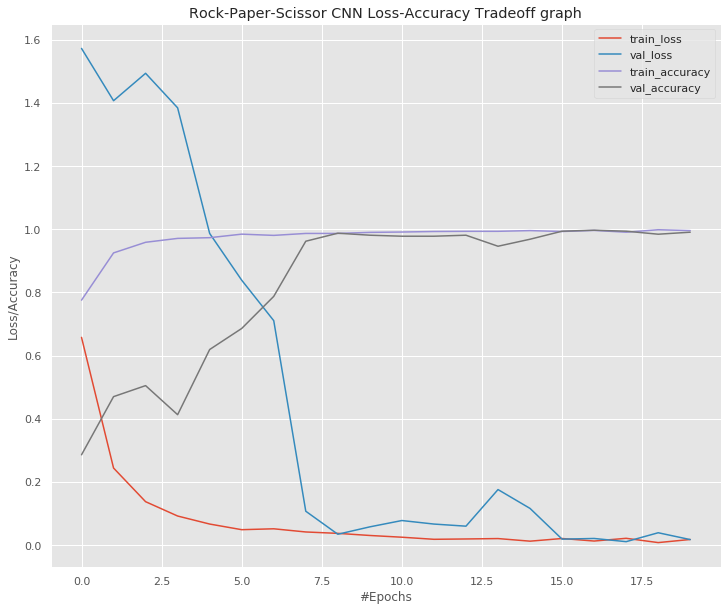

In [203]:
N = np.arange(0,EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(12,10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N , H.history["val_loss"] , label="val_loss")
plt.plot(N , H.history["accuracy"] , label="train_accuracy")
plt.plot(N , H.history["val_accuracy"], label="val_accuracy")
plt.title("Rock-Paper-Scissor CNN Loss-Accuracy Tradeoff graph")
plt.xlabel("#Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [204]:
#model.save('rps.model')

In [205]:
pred = model.predict(test_images)
pred

array([[3.01233705e-08, 1.00000000e+00, 8.52556137e-10],
       [1.60320928e-06, 9.99997020e-01, 1.45916806e-06],
       [2.03772021e-08, 9.99999881e-01, 7.38561567e-08],
       [8.47972734e-11, 1.00000000e+00, 2.82696391e-08],
       [1.11299583e-08, 9.99999881e-01, 1.08639085e-07],
       [1.12506179e-07, 9.99999762e-01, 9.01720369e-08],
       [2.74893459e-11, 1.00000000e+00, 6.34596686e-09],
       [2.87386371e-07, 9.99998808e-01, 9.27240876e-07],
       [2.97214456e-07, 9.99997735e-01, 1.99914530e-06],
       [2.82860856e-06, 9.99996901e-01, 1.85144401e-07],
       [1.19162449e-08, 1.00000000e+00, 5.70086756e-10],
       [2.59022855e-11, 1.00000000e+00, 6.92569913e-09],
       [1.97478887e-08, 9.99999881e-01, 7.19999704e-08],
       [3.57801477e-09, 9.99998093e-01, 1.84951296e-06],
       [8.13267320e-08, 9.99999881e-01, 1.43523922e-08],
       [1.20786456e-08, 1.00000000e+00, 6.85717794e-09],
       [1.54076668e-10, 1.00000000e+00, 1.14606369e-08],
       [3.60482355e-09, 9.99999

In [206]:
indexes = np.random.randint(0 , 87 , 9)
indexes

array([77, 26, 15, 70, 48, 27, 73, 27, 10])

In [207]:
i_vals = []

for idx in indexes:
  val = pred.argmax(axis=1)[idx]
  i_vals.append(val)


In [208]:
print(i_vals)

[2, 0, 1, 2, 2, 0, 2, 0, 1]


In [209]:
labels = []

for val in i_vals:
  label = lb.classes_[val]
  labels.append(label)


In [210]:
print(labels)

['Scissor', 'Paper', 'Rock', 'Scissor', 'Scissor', 'Paper', 'Scissor', 'Paper', 'Rock']


In [211]:

values = []

for i in indexes:
  val = np.amax(pred , axis=1)[i]
  values.append(val)


In [212]:
print(values)

[0.9816243, 0.99999964, 1.0, 0.9999833, 0.99999976, 0.99981195, 0.9999666, 0.99981195, 1.0]


In [213]:
values =  [i * 100 for i in values]
values

[98.16243052482605,
 99.99996423721313,
 100.0,
 99.99833106994629,
 99.99997615814209,
 99.98119473457336,
 99.99666213989258,
 99.98119473457336,
 100.0]

In [214]:
values = [round(num, 2) for num in values]
values

[98.16, 100.0, 100.0, 100.0, 100.0, 99.98, 100.0, 99.98, 100.0]

In [215]:
images = []

for i in indexes:
    images.append(outputs[i])

In [216]:
results = []

for i in range(9):
  text = labels[i]+" : "+str(values[i])
  images[i] = cv2.resize(images[i], (200,200))
  cv2.putText(images[i], text , (10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.7 , (0,0,255), 2)
  results.append(images[i])


-1

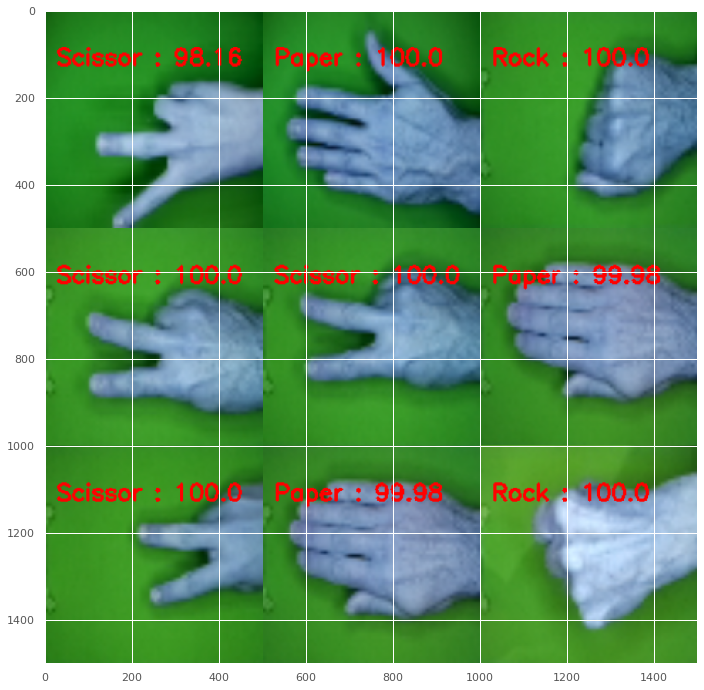

In [217]:
montage = build_montages(results, (500, 500), (3 ,3))[0]
# show the output montage
plt.figure(figsize=(12,12))
plt.imshow(montage)
cv2.waitKey(0)

In [218]:
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)

# serialize weights to HDF5
#model.save_weights("model.h5")